root
 |-- Title: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Number_of_Reviews: integer (nullable = true)

+--------+---------+---------+------+-----------------+
|   Title|   Author|    Genre|Rating|Number_of_Reviews|
+--------+---------+---------+------+-----------------+
|Book 335|Author 31|Self-Help|   4.8|             2968|
|Book 113|Author 33|  Fantasy|   3.8|             2317|
|Book 433| Author 4|  Romance|   4.9|              596|
|  Book 4|Author 41|Self-Help|   3.1|             3224|
|Book 425|Author 49|  Mystery|   3.7|             2136|
+--------+---------+---------+------+-----------------+
only showing top 5 rows

Top Books by Rating:

+--------+---------+-------+------+-----------------+
|   Title|   Author|  Genre|Rating|Number_of_Reviews|
+--------+---------+-------+------+-----------------+
| Book 49|Author 27|Mystery|   5.0|              125|
|Book 110|Author 39|Romance

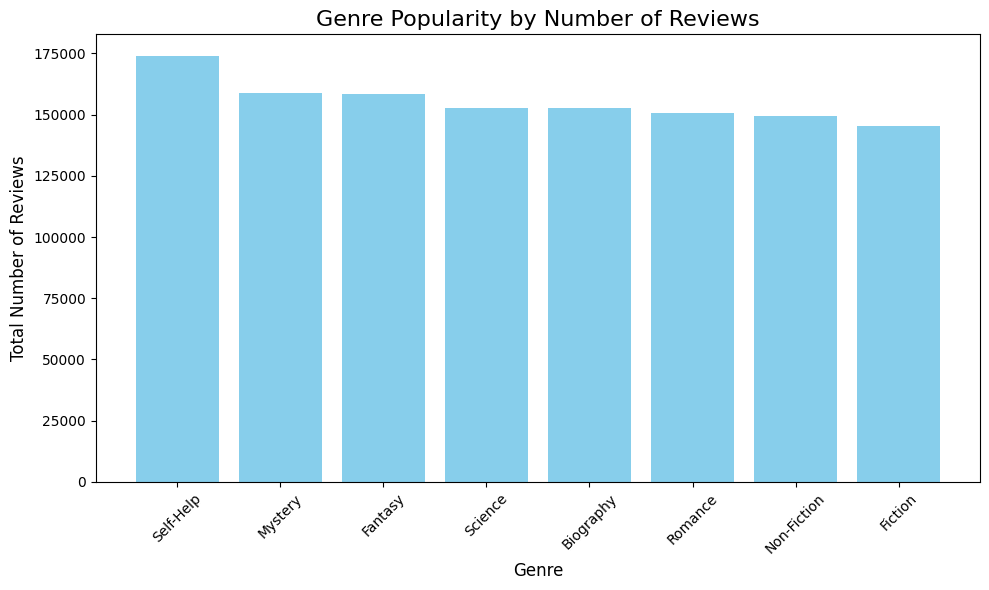

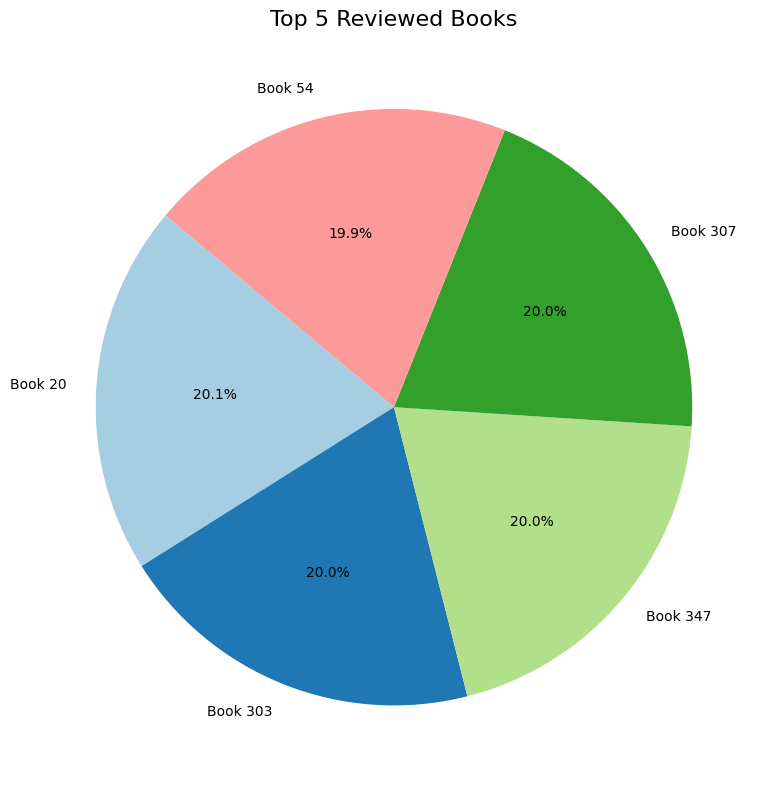

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc, sum as spark_sum
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder.appName("BookPopularityAnalysis").getOrCreate()

# Load dataset from CSV file
data_path = "books_dataset_large.csv"  # Replace with your dataset path
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Display the dataset schema and preview
df.printSchema()
df.show(5)

# 1. Analyze Top Books by Rating
print("Top Books by Rating:\n")
top_rated_books = df.orderBy(desc("Rating")).limit(5)
top_rated_books.show()

# 2. Analyze Top Books by Number of Reviews
print("\nTop Books by Number of Reviews:\n")
top_reviewed_books = df.orderBy(desc("Number_of_Reviews")).limit(5)
top_reviewed_books.show()

# 3. Analyze Popular Genres
genre_popularity = (
    df.groupBy("Genre")
    .agg(spark_sum("Number_of_Reviews").alias("Total_Reviews"))
    .orderBy(desc("Total_Reviews"))
)
print("\nGenre Popularity (by Number of Reviews):\n")
genre_popularity.show()

# Convert genre_popularity to Pandas for Visualization
genre_popularity_pd = genre_popularity.toPandas()

# Visualization
plt.figure(figsize=(10, 6))

# Bar chart for Genre Popularity
plt.bar(genre_popularity_pd["Genre"], genre_popularity_pd["Total_Reviews"], color="skyblue")
plt.title("Genre Popularity by Number of Reviews", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Total Number of Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("genre_popularity.png")  # Save the chart as an image
plt.show()

# Convert top_reviewed_books to Pandas for Visualization
top_reviewed_books_pd = top_reviewed_books.toPandas()

# Pie chart for Top 5 Reviewed Books
plt.figure(figsize=(8, 8))
plt.pie(
    top_reviewed_books_pd["Number_of_Reviews"],
    labels=top_reviewed_books_pd["Title"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors,
)
plt.title("Top 5 Reviewed Books", fontsize=16)
plt.tight_layout()
plt.savefig("top_books_piechart.png")  # Save the chart as an image
plt.show()

# Stop the Spark Session
spark.stop()
